# Natural Language Processing

Typical applications:
- Group news/articles by topics
- Sentiment analysis
- Find relevant documents among thousands of pages

Typical pipeline:
- Compile documents
- Featurize them
- Compare their features

Commonly, a **vectorization** in the form of **bags of words** are used: sets of words (unordered and wothout grammatical links) for which appearances are counted. These can be understood as dictionaries of key-value pairs in which: key = word, value = occurrences.

Given a bag of words definition, its values for texts are computed -- we end up having a vector. Similarities between texts can be computed with the **cosine similarity ** between both bags or vectors:

```python
bag = {'father','mother','god','son'}
a = {'father':10,'mother':1,'god':7,'son':15}
b = {'father':7,'mother':10,'god':0,'son':1}
sim(a,b) = cos(a,b) = dot(a,b) / (length(a) * length(b))
```

The **Corpus** is defined as the group of all documents. We can improve the bag of words vectors by adjusting the occurrencies with the overall word frequencies: **Term Frequency - Inverse Document Frequency**. This is defined with two frequencies:

1. Term Frequency: Importance of the term within the document:
    ```python
    TF(d,t): occurrences of term t in document d
    ```

2. Inverse Document Frequency: Importance of the term in the corpus:
    ```python
    IDF(t) = log(D/n): 
        D: total number of documents in corpus
        n: number of documents with the term t
    ```

Then, assembling both: Term Frequency - Inverse Document Frequency:
```python
TFIDF(d,t) = TF(d,t) * IDF(t) = TF(d,t) * log(D/n)
```

Notes on TFIDF:
- TF also often is divided by the total number of terms in the document
- IDF values for common words are obviuosly lower, because they are less significant
- TFIDF values are used to rank a document's relevance given a user query in a search engine.
See more here: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

Another option to TFIDF would be to just mark the word with `1/0`: `present/absent`. In that case, we don't need frequencies anymore. The frequency features are known to represent **Multinomial Documents**, whereas the presence features are known to represent **Bernoulli Documents**.

Once the **vectorization** has been done, we could:
- Compare words with cosine simularity
- Train a classificator with an annotated set of messages
    - Naive Bayes is known to work well for NLP, as well as Random Forests; but we can actually test any classifier easily using the `Pipeline` functionality!

Install used packages: NLTK: https://www.nltk.org

```python
conda install nltk
pip/3 install nltk
```

For downloading selected datasets and corpuses manually:
```
import nltk
nltk.download_shell() # or nltk.download_gui(), nltk.download()
```

We download the `stopwords` corpus, which is a corpus of common, thus, usually useless words that we need to remove from our texts (e.g., 'the', 'and', ...).

Additionally, we are going to work with a SMS spam dataset:
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
- 5,574 SMSs, tagged acording being `ham` (legitimate) or `spam`
- SMSs collected from several sources
- We want to predict whether an SMS is ham/spam

In [1]:
import nltk

In [ ]:
# Interactive downloading shell: enter 'l'(ist)
# Enter 'd'(ownload), then 'stopwords'
nltk.download_shell()

In [13]:
# Each line is a message tagged with: ham (legitimate) / spam TAB content
# So it's a TABs separated values file (TSV)
messages = [line.rstrip() for line in open('data/smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [14]:
# First message
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
# First 5 messages
# We can see that 
for message_no, message in enumerate(messages[:5]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [16]:
# We can load dataset also with pandas
import pandas as pd

In [17]:
messages = pd.read_csv('data/smsspamcollection/SMSSpamCollection',
                       sep='\t',
                       names=['label','message'])

In [18]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# We print some aggregate descriptive values
# There are less unique messages than number of messages, which is normal:
# 'I'll call later', 'Yes', ...
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
# Always group by and display describe() data
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Exploratory Analysis

First we do some explorative visualizations.

In [21]:
# We create a new column for the message length and use apply(len)
messages['length'] = messages['message'].apply(len)
# For number of words, it could be
#messages['length'] = messages['message'].apply(lambda t: len(t.split()))

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

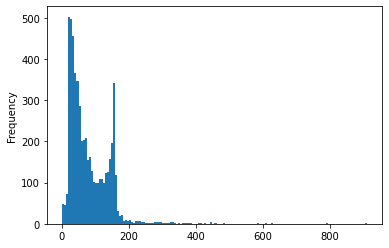

In [25]:
# The length histogram shows a bi-modal distribution: that's a good hint
# We also see that there are few very long messages...
messages['length'].plot.hist(bins=150)

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [37]:
# We print the complete content of the longest message
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

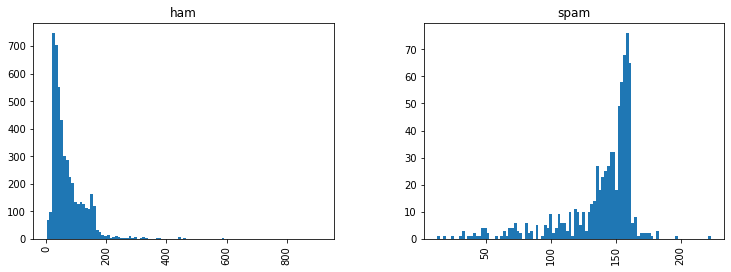

In [39]:
# Two histograms, one for each of the ham/spam labels
# We can see each label has a mode (peak)
messages.hist(column='length',by='label',bins=100,figsize=(12,4))

<AxesSubplot:xlabel='length', ylabel='Count'>

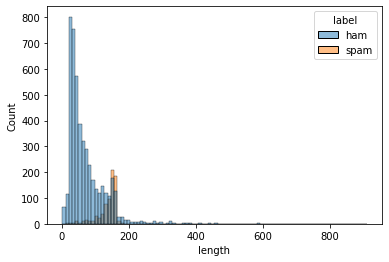

In [40]:
# Two distributions overlapping using hue
# Spam messages definitely tend to be longer
sns.histplot(data=messages,x='length',hue='label')

## Feature Engineering

We extract features from the messages.
The more domain knowledge we have the better.
First we clean the text (punctuation) and create bags or words.
We also remove useless words, and we could additionally replace words from the same stem by the stem (**temming**).
This preprocessing is also called **normalization**.
After the preprocessing, we have lists of **tokens**, aka. **lemmas**, with which we perform the **vectorization**:
- a matrix of N unique words x n messages is built
- the cells are filled up with the occurrences (**term frequency**),
- cell values are weighted (frequent tokens get lower weight **inverse document frequency**)
- vectors are normalized (L2)

The resulting vectorization is in a format comprehensible for many machine leanrning modules.

The package `nltk` is very useful in many steps, look at the book:
http://www.nltk.org/book/

In [45]:
import string

In [46]:
# String with punctuation symbols
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
# Test text
mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation; if not, take them
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string
# '' is basically empty, but if not used, chars are returned in a list!
nopunc = ''.join(nopunc)

In [43]:
# Message without punctuation
nopunc

'Sample message Notice it has punctuation'

In [47]:
# We load the stopword corpus, which contains usually useless common words
# With .words('language') we get a list of most common words in the language
from nltk.corpus import stopwords

In [49]:
len(stopwords.words('spanish'))

313

In [50]:
len(stopwords.words('english'))

179

In [51]:
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [52]:
# We remove from the messages the most common words
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [53]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [61]:
# We create a function that tokenizes a message
# From a sentence, a list of (significant) words is returned
def text_process(mess):
    """
    Tokenization:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of significant words
    """
    # Check characters to see if they are in punctuation; if not, take them
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string
    nopunc = ''.join(nopunc)
    # We remove from the messages the most common words
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [62]:
# Punctuation, 'it' and 'has' are removed
text_process('Sample message! Notice: it has punctuation.')

['Sample', 'message', 'Notice', 'punctuation']

In [63]:
# Test the function
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [64]:
# We could apply stemming using nltk:
# words that stem from the same root are replaced by the root, eg:
# run, running, ran -> run
# However, we can see that our messages have particular words that make that difficult:
# U, c, dun, ...

### Vectorization

In [66]:
# We create a sparse word vs message matrix
# all N unique words vs all n messages
# Cells are filled with the word occurrences

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
# We create our Bag of Words (bow) transformer
# We can pass many params, we just pass our analyzer function
# We fit the transformer to our messages
# The resulting transformer can transform any message to a vector
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
# IMPORTANT: we could also directly pass messages['message'] without our custom analyzer
# In that case, the 'word' count analyzer with punctuation & with common words would be used
# bow_transformer = CountVectorizer().fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [72]:
# bow_transformer takes any message and can transform it
# into a vector occurrences for all unique words
message4 = messages['message'][3]
print(message4)
print('\n')
bow4 = bow_transformer.transform([message4])
print(bow4) # 7 unique words
print(bow4.shape)

U dun say so early hor... U c already then say...


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [73]:
# We can get feature names with the index number
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

UIN
schedule


In [74]:
# We vectorize all messages, ie
# ee create a sparse word vs message matrix
# all N unique words vs all n messages
# Cells are filled with the word occurrences
messages_bow = bow_transformer.transform(messages['message'])

# NOTE: A common short version is
# cv = CountVectorizer()
# X = cv.fit_transform(X)

In [75]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [79]:
# The sparsity is a measure of how filled th ematrix is
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(1.0 - sparsity))

sparsity: 0.9205970458733178


In [ ]:
# We create the transformer that produces for each matrix cell the
# Term Frequency - Inverse Document Frequency:
# TFIDF(d,t) = TF(d,t) * IDF(t) = TF(d,t) * log(D/n)
# The transformer normalizes the vectors, too (default L2 norm)

In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [82]:
# We can get the inverse document frequencies of selected words
# For instance: TFIDF of 'university'?
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


In [89]:
# We apply the TFIDF transformed to our complete messages_bow matrix
# Now, our messages are represented as numerical frequency vectors
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Classification with Naive Bayes

In [118]:
# Naive Bayes is known to work well for NLP
# Since we have frequencies, i.e., multinomial documents, we use MultinomialNB
# BUT: We could also pick the RandomForestClassifier!
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# MultinomialNB can be readily fit with our messages_tfidf
# HOWEVER: we need to apply a train-test split - see below
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [95]:
# We pick a message and perform inference on it
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [98]:
messages.label[3]

'ham'

In [94]:
# We pick a message and perform inference on it
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [100]:
# We can also predict all
all_pred = spam_detect_model.predict(messages_tfidf)

In [107]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [108]:
# However, we should use a train-test split!

### Train-Test Split + Pipeline

We can store all the steps of our workflow/application in a sklearn Pipeline object.
Therefore, we properly perform the split of th eoriginal messages and construct a pipeline.

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [119]:
# We create a Pipeline of processes:
# We pass a list of objects that perform the processing
# IMPORTANT: We can change our classifier and see how the performance changes easily!
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    #('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
    ('classifier', RandomForestClassifier(n_estimators=200)),  # train on TF-IDF vectors w/ Random Forests classifier
])

In [120]:
# Apply the Pipeline: Train/Fit
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fcc743770d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [121]:
# We use the Pipeline for predictions too!
predictions = pipeline.predict(msg_test)

In [122]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [123]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99       985
        spam       0.83      1.00      0.91       130

    accuracy                           0.98      1115
   macro avg       0.91      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [125]:
print(confusion_matrix(predictions,label_test))

[[958  27]
 [  0 130]]


## Exercise: Yelp Dataset

Yelp dataset contains X text reviews and 1-5 ratings: https://www.kaggle.com/c/yelp-recsys-2013
- In addition to that we have also bussines & user & review ids
- We have also votes of the reviewers (cool) and of the reviews (useful & funny)

We want to train a classificator to predict a rating given a text review.
This is concise summary of the steps we could take, although the results have a lot of room to be improved.

### Exploratory Analysis

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
yelp = pd.read_csv('data/yelp.csv')

In [164]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [165]:
# New column: review length
yelp['text length'] = yelp['text'].apply(lambda t: len(t.split()))

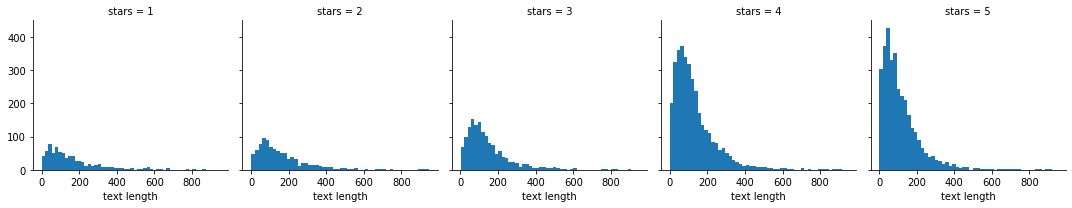

In [167]:
# Length distributions for different stars
g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

<AxesSubplot:xlabel='stars', ylabel='text length'>

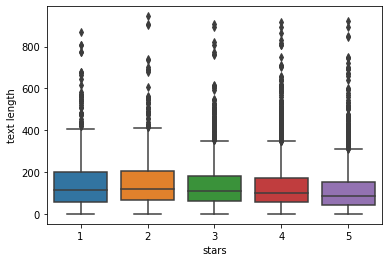

In [169]:
# Boxplot
sns.boxplot(data=yelp,x='stars',y='text length')

<AxesSubplot:xlabel='stars', ylabel='count'>

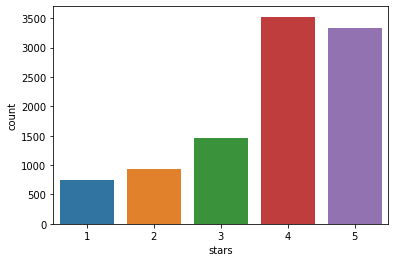

In [132]:
# How many ratings for each star?
sns.countplot(data=yelp,x='stars')

In [133]:
# Are column variables correlated?
stars = yelp.groupby('stars').mean()
corr = stars.corr()
corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


<AxesSubplot:>

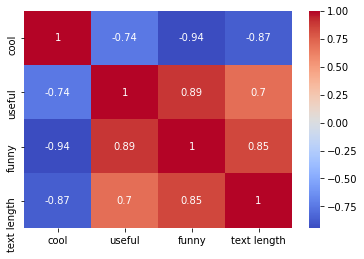

In [134]:
sns.heatmap(corr,cmap='coolwarm',annot=True)

### Classification

In [150]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [151]:
# Pipeline definition
# We can play using different classificators
# And we can also play using bags of word counters alone or combined TFIDFs
# TFIDF will not always yield better results
# IMPORTANT: We need to pass the text strings now to the pipeline, not the vectorized ones...
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts, this time without custom analyzer
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
    #('classifier', RandomForestClassifier(n_estimators=200)),  # train on TF-IDF vectors w/ Random Forests classifier
])

In [157]:
# Since NLP for this kind of problem class is difficult
# We could also try to simplify the problem by taking only stars 1 & 5
#yelp = pd.read_csv('data/yelp.csv')
#yelp['text length'] = yelp['text'].apply(lambda t: len(t.split()))
yelp = yelp[(yelp['stars']==1)|(yelp['stars']==5)]
X = yelp['text']
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [158]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [159]:
predictions = pipeline.predict(X_test)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
print(classification_report(predictions,y_test))
print('\n')
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           1       0.67      0.87      0.75       159
           5       0.98      0.94      0.96      1067

    accuracy                           0.93      1226
   macro avg       0.82      0.90      0.86      1226
weighted avg       0.94      0.93      0.93      1226



[[138  21]
 [ 69 998]]
